# Customer Churn Prediction 

##  Overview
 Customer churn, or customer attrition, refers to when a customer ceases their relationship
 with a company or service provider. In today's highly competitive business environment,
 retaining customers is a critical factor for long-term success. Predicting customer churn can
 help organizations take proactive steps to retain customers, thus minimizing revenue loss.

## Problem Statement
Predicting customer churn, to help the company proactively design retention strategies to
 keep these customers, thereby improving customer satisfaction and reducing financial loss.
 

This project aims to build a machine learning model that can predict whether a customer will
 churn based on their demographic, account, and service-related data.
 We will develop a classification model that predicts whether a customer
 will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
 with information about the services they use (such as internet service, phone service, and
 online security), we will attempt to build a model that helps the company identify customers
 who are at a high risk of churning.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_excel('Customer_data.xlsx')

In [7]:
# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [5]:
# Drop any unnecessary columns (for example, 'id', 'date')
df.drop(['customerID'], axis=1, inplace=True)

In [13]:
# Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#filling null values by the mean of total charges coliumn
df['TotalCharges']=df['TotalCharges'].fillna(round(df['TotalCharges'].mean()))
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Encode categorical variables
label_encoders={}
for column in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le

In [11]:
# Define features (x) and target variable (y)
x = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:

# Normalize numerical features
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
### Exploratory Data Analysis (EDA)

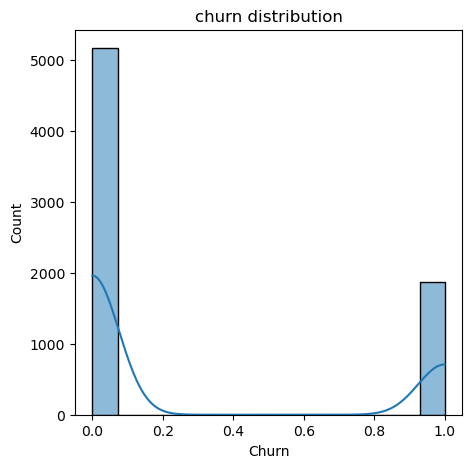

In [27]:
# Visualize the distribution of key features
plt.figure(figsize=(5,5))
sns.histplot(df['Churn'], kde=True)
plt.title('churn distribution')
plt.show()

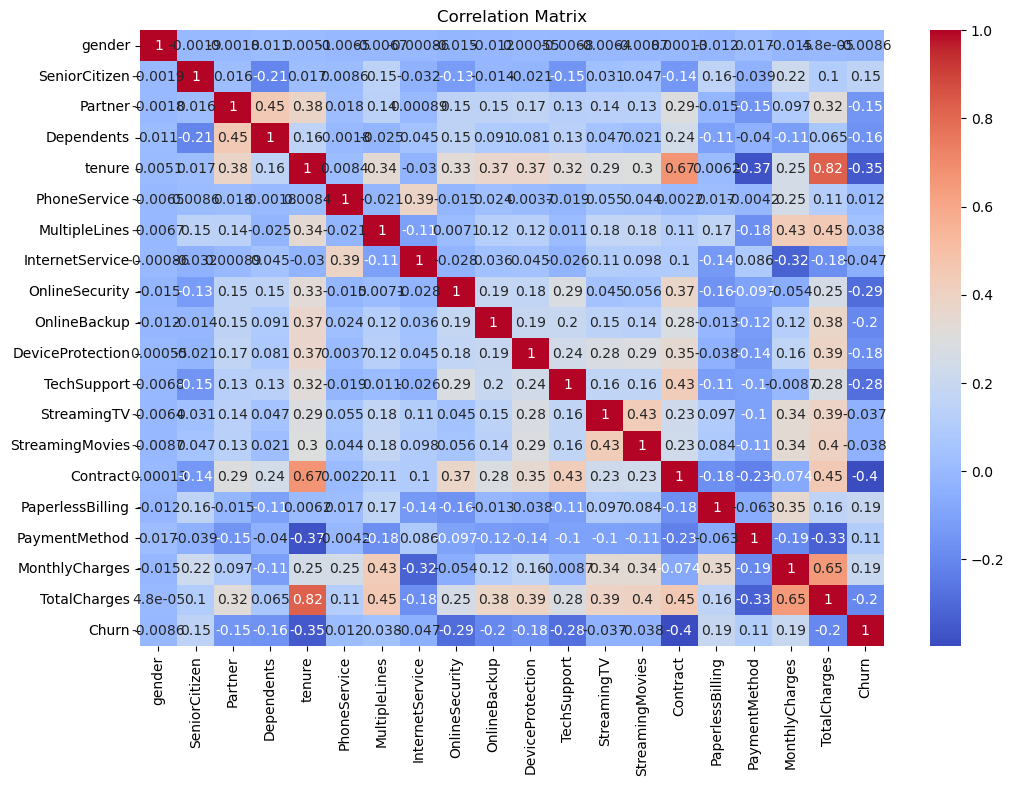

In [112]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### clearly, for the matrix following observations can be made:
- as tech support and contract are inversely related to churn
- in case of Partner and  Dependents churn is less
- as monthly charges increase probability for customer churing increases.
therefore company should focus more on regulating their charges, providing good technical support and customized family subscription offers and other value added services. 
 

# Model Creation

### 1. Logistic Regression

In [113]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [114]:
# Predict on the test set
y_pred_log = log_reg.predict(x_test)

In [118]:
# Accuracy score for Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")

Logistic Regression Accuracy: 81.62%


In [26]:
#Defining a custom function to call for the evaluation

def evaluate_model(y_test, y_pred, model_name):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix.T, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))


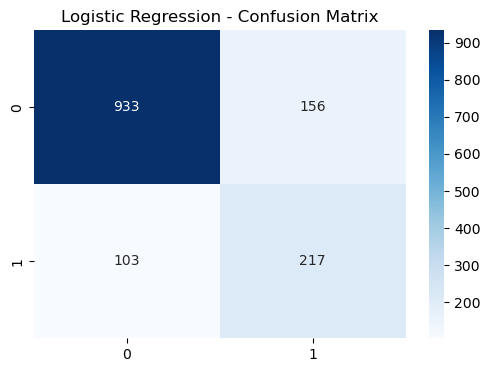

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [200]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")

In [147]:
# hyper parameter tuning
param_grid_log = {'C': [0.1, 1, 10,.5], 'solver': ['liblinear', 'saga','lbfgs'],'max_iter':[10,30,50,75,100,200]}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=10, scoring='accuracy')
grid_log_reg.fit(x_train, y_train)

print(f"Best Logistic Regression Parameters: {grid_log_reg.best_params_}")
print(f"Best Logistic Regression Accuracy: {grid_log_reg.best_score_ * 100:.2f}%")

Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 30, 'solver': 'saga'}
Best Logistic Regression Accuracy: 79.87%


### 2. Random Forest

In [17]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

In [21]:
# Accuracy score for Logistic Regression
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf* 100:.2f}%")

Random Forest Accuracy: 79.42%


In [23]:
# hyper parameter tuning
param_grid_rf = {'criterion':["gini", "entropy", "log_loss"]}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf,cv=10,scoring='accuracy')
grid_rf.fit(x_train, y_train)

print(f" Random Forest Parameters: {grid_rf.best_params_}")
print(f" Random Forest Accuracy: {grid_rf.best_score_ * 100:.2f}%")

 Random Forest Parameters: {'criterion': 'log_loss'}
 Random Forest Accuracy: 78.97%


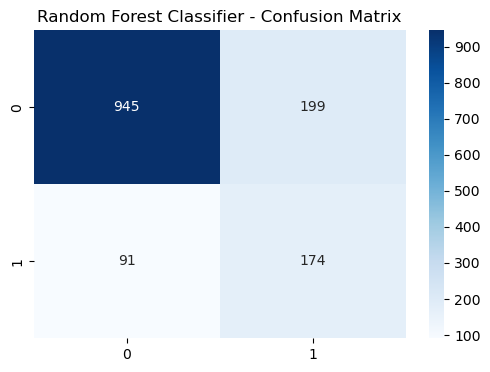

Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [28]:
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

## 3. Support Vector Machine

In [205]:
s=SVC()
s.fit(x_train,y_train)

SVC()

In [207]:
# Predict on the test set
y_pred_s = s.predict(x_test)

In [209]:
# Accuracy score for Logistic Regression
accuracy_s = accuracy_score(y_test, y_pred_s)
print(f" support vector machine Accuracy: {accuracy_s* 100:.2f}%")

 support vector machine Accuracy: 80.70%


In [241]:
# hyper parameter tuning
param_grid_s = {'C':[0.1,1,10],'kernel':['poly', 'rbf', 'sigmoid']}
grid_s = GridSearchCV(SVC(), param_grid_s,cv=10,scoring='accuracy')
grid_s.fit(x_train,y_train)

print(f"Best Support Vector Machine Parameters: {grid_s.best_params_}")
print(f"Best Support Vector Machine Accuracy: {grid_s.best_score_ * 100:.2f}%")

Best Support Vector Machine Parameters: {'C': 0.1, 'kernel': 'sigmoid'}
Best Support Vector Machine Accuracy: 79.52%


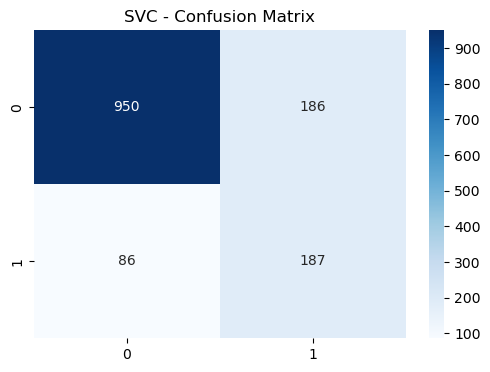

SVC - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [243]:
evaluate_model(y_test, y_pred_s, "SVC")

clearly logistic regression model is giving best values for accuracy, recall, f1 score and precision 

In [ ]:
video explanation
https://drive.google.com/file/d/1FKJ9v1n1hSEa9WhQPoCpt9KZhKI6Zmux/view?usp=drivesdk